# Database Programming
Here are the topics covered as part of this module.
* Overview of Database Programming
* Recap of RDBMS Concepts
* Install and Validate JDBC Connector
* Applying Filtering
* Query Execution Life Cycle
* CRUD Operations
* Preparing Database
* Inserting Data
* Updating and Deleting Data
* Best Practices

## Overview of Database Programming

Let us get an Overview of Database Programming.
* When we develop web or mobile applications, data is typically stored in Databases.
* There are different varieties of Databases.
  * RDBMS - for example: Oracle, Mysql, Postgres, informix, MS SQL, DB2 etc.
  * Data Warehouse - for example: Teradata, Vertica, Greenplum, RedShift, Snowflake etc.
  * NoSQL - for example: MongoDB, Cassandra, HBase, DynamoDB etc.
  * Search based - Elasticsearch, Solr etc
  * Graph based - Neo4J
* Almost all the databases provide JDBC driver to connect to the database from application layer. Applications are typically developed using Programming Languages like Python, Scala, Java etc.
* We need to use the JDBC driver provided to connect to the database.
* Also one should be familiar with underlying Database Concepts to be comfortable with JDBC programming.
* Typically Databases will be setup on remote servers and accessible using the following information:
  * Server IP or DNS Alias on which Database Server is running.
  * Port Number using which Database Server is running.
  * Username
  * Password
  * Database Name
* We typically perform CRUD Operations against our databases.


## Recap of RDBMS Concepts
We will develop JDBC programs using MySQL which is RDBMS Database.
* RDBMS stands for Relational Database Management System.
* Tables will be normalized to ensure that records are uniquely identifiable, related with each other, etc.
* Most of the database tables supporting transactional applications are either in 3rd Normal Form or Boyce Codd Normal Form.
* There are different types of relationships between tables.
  * one to one
  * one to many
  * many to one
  * many to many (typically implemented via bridge tables)
* Tables typically contain different type of constraints.
  * Primary Key Constraints
  * Unique Key Constraints
  * Not Null Constraints
  * Foreign Key Constraints referencing Primary Key Constraints of its parent table.
  * and more

* Data Model for Oracle HR Database
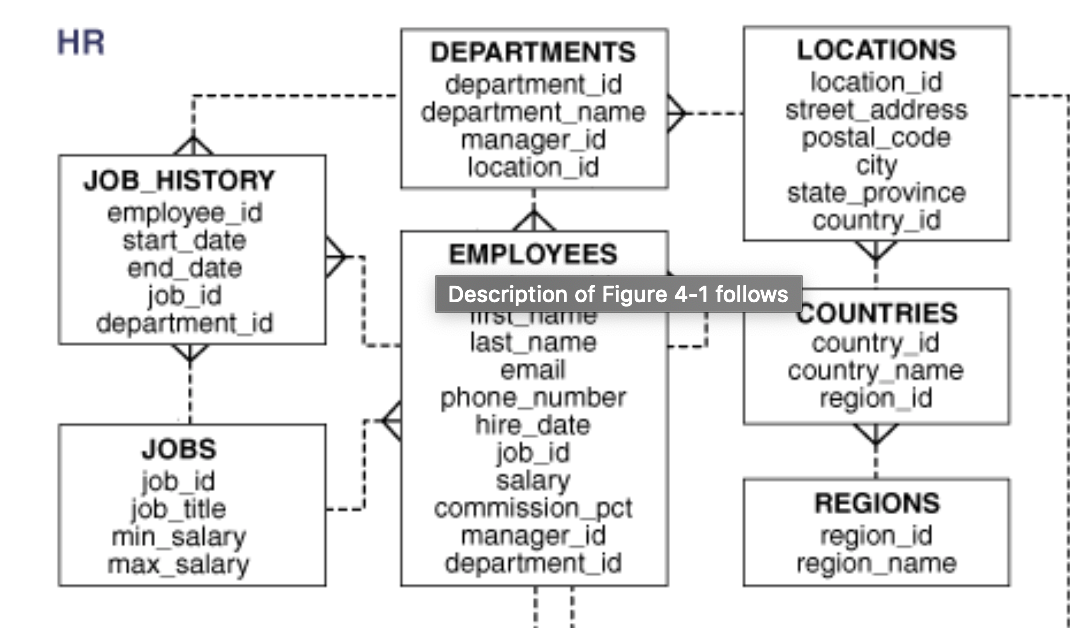

* Data Model for Cloudera's Retail Database
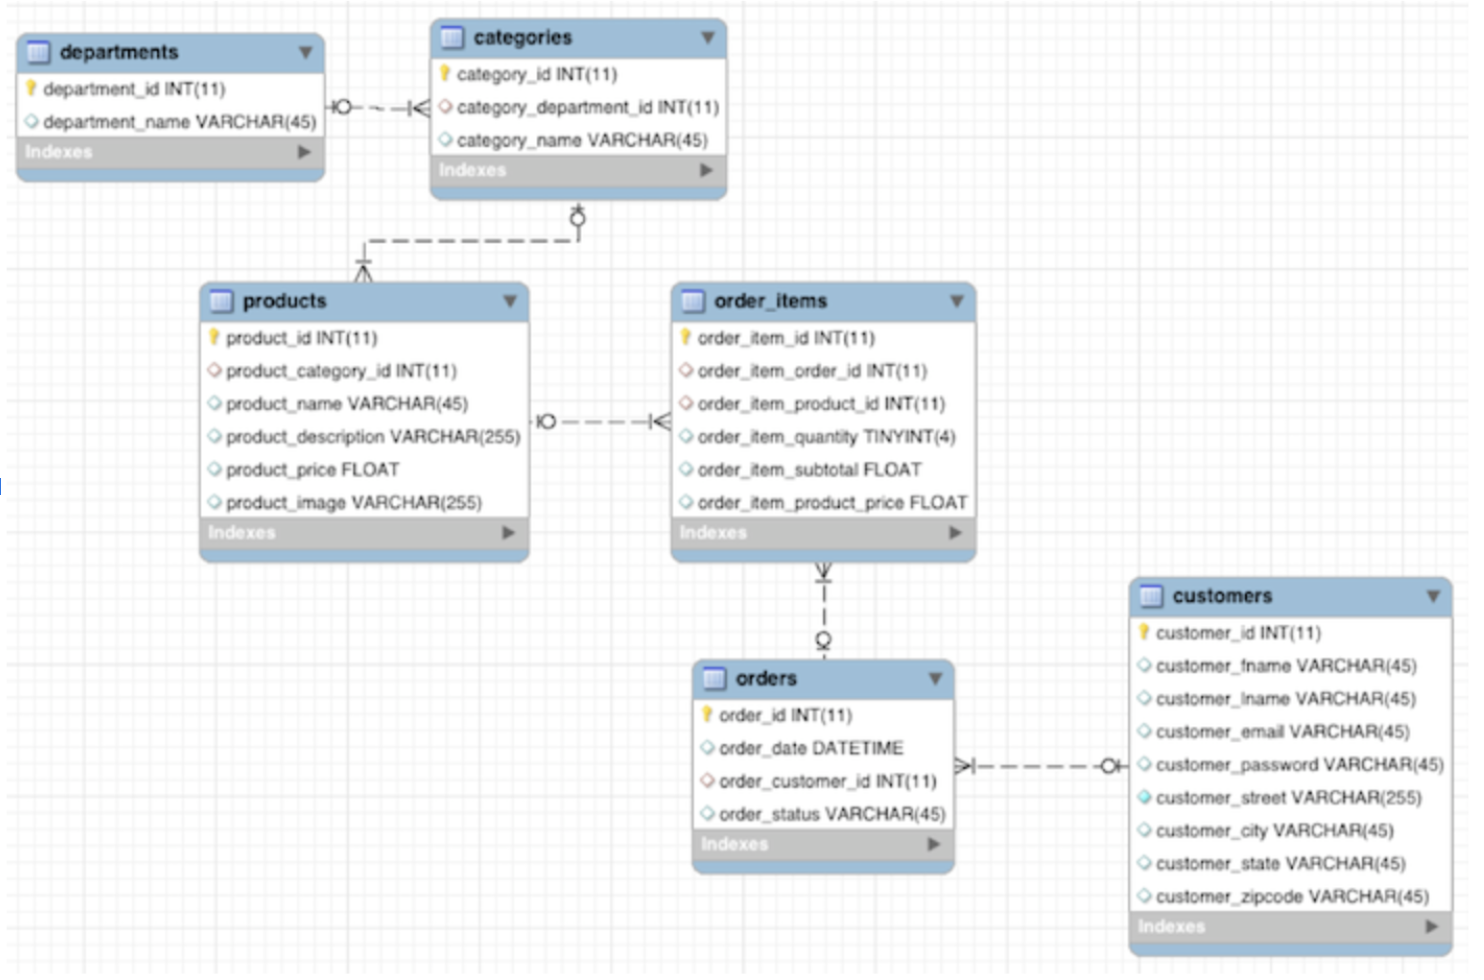

## Install and Validate JDBC Connector

Let us understand how to install JDBC Connector to connect to MySQL Database and run queries.

* You can install MySQL Python connector using `python3 -m pip install mysql-connector-python`
* `mysql-connector-python` provides us a package called as `mysql.connector`.
* We can use `connect` function from the `mysql.connector` package to connect to a database with JDBC information.
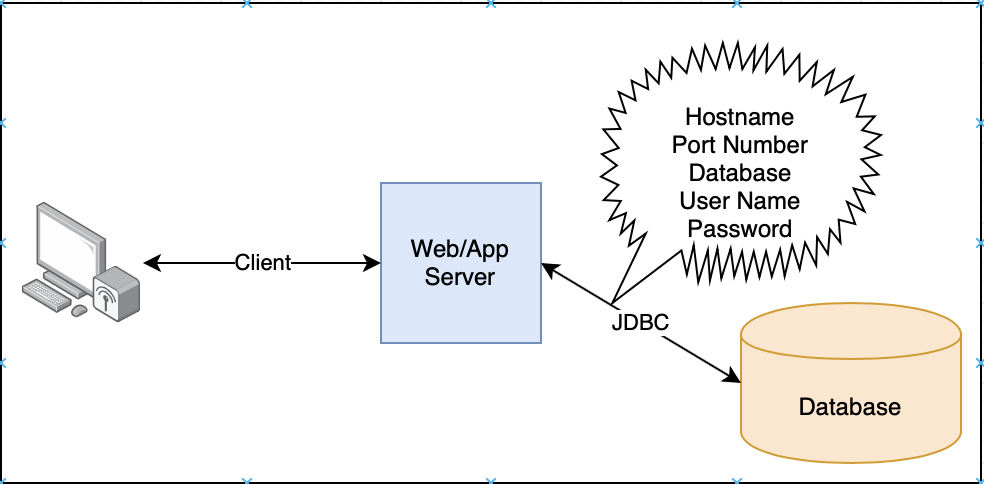

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "localhost"
db = "retail_db"

connection = mc.connect(user=user, 
                        password=password,
                        host=host,
                        database=db
                       )
connection.close()

* Here is the function which will return the connection object.

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec

def get_connection(user, password, host, db):
    try:
        connection = mc.connect(user=user, 
                                password=password,
                                host=host,
                                database=db
                               )
    except mc.Error as error:
        if error.errno == ec.ER_ACCESS_DENIED_ERROR:
            print("Invalid Credentials")
        else:
            print(err)
    return connection

* Validating the get_connection function.

In [ ]:
user = "retail_user"
password = "itversity"
host = "ms.itversity.com"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )
connection.close()

* The returned connection object exposes a function called as `cursor`.
```
orders_cursor = connection.cursor()
```
* Using `cursor`, we can execute queries using `query` function. It takes a valid query as a string.
```
query = """SELECT * FROM orders LIMIT 10"""
orders_cursor.execute(query)
```

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "localhost"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = """SELECT * FROM orders LIMIT 10"""
orders_cursor.execute(query)

for order in orders_cursor:
    print(order)

connection.close()

## Applying Filtering

Let us understand how to build queries to filter the data. 
* We should leverage database capacity to filter as much data as possible (rather than fetching data into application layer and then filtering).
* We should avoid hard coding while filtering the data.
* Here is the example of hardcoding the values. It is similar to using `Statement` in Java.

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "ms.itversity.com"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()

query = "SELECT * FROM orders WHERE order_status = 'COMPLETE' LIMIT 10"
orders_cursor.execute(query)

for order in orders_cursor:
    print(order)

connection.close()

* Here is the example of binding the values. It is similar to using `PreparedStatement` in Java.

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "ms.itversity.com"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()

query = "SELECT * FROM orders WHERE order_status = %s LIMIT 10"
orders_cursor.execute(query, ("COMPLETE",))

for order in orders_cursor:
    print(order)

connection.close()

## Query Execution Life Cycle
Here is the query execution life cycle.
* Compile the query.
  * Check for existing query plan using hash value.
  * Perform Syntax and Semantics Check.
  * Generate hash value.
  * Last 2 steps result in significant overhead.
* Generate Explain Plan.
* Run the query.
  * Read the data from database files.
  * Process the data based up on query logic.

* Example with hardcoded query.

In [41]:
%%time

import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "ms.itversity.com"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()

for i in range(1, 21):
    query = f"SELECT * FROM orders WHERE order_id = {i}"
    orders_cursor.execute(query)
    print('.', end='')
    for order in orders_cursor:
        pass

connection.close()

....................CPU times: user 23.1 ms, sys: 8.48 ms, total: 31.6 ms
Wall time: 2.69 s


* Example using bind variable (supposed to be efficient).
* However some versions of Python does not use caching in case of prepared statements.
* In our case using Prepared Statements is slower compared to Statements.

In [42]:
%%time

import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "retail_user"
password = "itversity"
host = "ms.itversity.com"
db = "retail_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor(prepared=True)

for i in range(1, 21):
    query = f"SELECT * FROM orders WHERE order_id = %s"
    orders_cursor.execute(query, (i,))
    print('.', end='')
    for order in orders_cursor:
        pass

connection.close()

....................CPU times: user 27 ms, sys: 9.71 ms, total: 36.7 ms
Wall time: 4.68 s


## CRUD Operations

Make sure to connect to mysql and create a demo database to perform insert, update and delete.

Here is the process for performing any CRUD Operation.
* Establish connection to the database - Create Connection Object
* Create Cursor Object
* Build Statement to perform one or more insert, update or delete
* Make sure transactions without exceptions are committed and transactions with exceptions are rolled back.
* Make sure cursors as well as connections are closed


## Preparing Database

Let us prepare the database in which we can create tables for running CRUD operations.

* If you have access to MySQL Database, login as root or any other MySQL Admin user and run this script.

```
CREATE DATABASE demo_db;

CREATE USER demo_user IDENTIFIED BY 'itversity';
GRANT ALL ON demo_db.* TO demo_user;

USE demo_db;
CREATE TABLE orders (
  order_id INT PRIMARY KEY,
  order_date DATETIME,
  order_customer_id INT,
  order_status VARCHAR(20)
);
```

## Inserting Data
* Inserting one record at a time into a table.
* We can hard code and perform DML operations such as insert.
* Execution life cycle of insert statement.
  * Generate hash code and see if there is any compiled statement in database compile cache.
  * If the hash code does not exists, compile the statement.
  * Execute the statement which generates transaction log.
  * Apply transaction log to persist data on to the file.
* Even if you change a single character in the statement, it will generate a new hash code and result in compiling a statement.
* If we hard code then each time **insert** statement will result in compilation. To avoid we use a concept of bind variables using this syntax.

```
query = ("""INSERT INTO orders
            (order_id, order_date, order_customer_id, order_status)
            VALUES
            (%s, %s, %s, %s)
        """)

order_date = datetime.datetime(2013, 7, 25, 0, 0, 0)
orders_cursor.execute(query, (1, order_date, 100, "COMPLETE",))
```


In [ ]:
# Hardcoded approach (not recommended)

import datetime
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "demo_user"
password = "itversity"
host = "localhost"
db = "demo_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = ("""INSERT INTO orders
            (order_id, order_date, order_customer_id, order_status)
            VALUES
            (1, '2013-07-25 00:00:00.0', 100, 'COMPLETE')
        """)

orders_cursor.execute(query)
connection.commit()
connection.close()

In [ ]:
# Using the concept of bind variables
# It is also called as Prepared Statements in Java

import datetime
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "demo_user"
password = "itversity"
host = "localhost"
db = "demo_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = ("""INSERT INTO orders
            (order_id, order_date, order_customer_id, order_status)
            VALUES
            (%s, %s, %s, %s)
        """)

order_date = datetime.datetime(2013, 7, 25, 0, 0, 0)
orders_cursor.execute(query, (2, order_date, 1001, "CLOSED",))
connection.commit()
connection.close()

## Updating and Deleting Data

Let us see how we can perform update or delete.

#### Updating Data
Let us understand how data is updated using update statement.
* Typically we will have 2 clauses in update.
  * `SET` clause where the columns that are supposed to be updated.
  * Optional `WHERE` clause where we specify the condition to filter for rows that need to be updated.
* As part of the `WHERE` clause generally we will have indexed column for performance reasons.

In [ ]:
import datetime
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "demo_user"
password = "itversity"
host = "localhost"
db = "demo_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = ("""UPDATE orders
            SET order_status = %s
            WHERE order_id = %s
         """)

orders_cursor.execute(query, ('CANCELED', 1))
connection.commit()
connection.close()

In [ ]:
import datetime
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "demo_user"
password = "itversity"
host = "localhost"
db = "demo_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = ("""DELETE FROM orders
            WHERE order_id = %s
         """)

orders_cursor.execute(query, (1, ))
connection.commit()
connection.close()

#### Deleting Data
Let us understand how data is updated using update statement.
* Delete statement will have optional `WHERE` clause where we specify the condition to filter for rows that need to be deleted.
* As part of the `WHERE` clause generally we will have indexed column for performance reasons.

In [ ]:
import datetime
import mysql.connector as mc
from mysql.connector import errorcode as ec

user = "demo_user"
password = "itversity"
host = "localhost"
db = "demo_db"

connection = get_connection(user=user,
                            password=password,
                            host=host,
                            db=db
                           )

orders_cursor = connection.cursor()
query = ("""DELETE FROM orders
            WHERE order_id = %s
         """)

orders_cursor.execute(query, (2,))
connection.commit()
connection.close()

## Best Practices

Let us go through some best practices to perform batch load.
* We should minimize the number of connections to database.
* We should avoid executing queries using hard coded values. Rather, we should prefer bind variables.
* Too much committing is bad as commit incurs overhead.
* If we have to load considerable amount of data, we should consider committing every 1,000 records or 10,000 records or even more based up on the capacity of the database.
* Most of the mainstream databases perform direct path I/O or batch load which might perform better compare to looping, inserting and committing data.

In [ ]:
import mysql.connector as mc
from mysql.connector import errorcode as ec
import pandas as pd
import datetime

In [ ]:
def get_connection(user, password, host, db):
    try:
        connection = mc.connect(user=user, 
                                password=password,
                                host=host,
                                database=db
                               )
    except mc.Error as error:
        if error.errno == ec.ER_ACCESS_DENIED_ERROR:
            print("Invalid Credentials")
        else:
            print(err)
    return connection

In [ ]:
def get_cursor(connection):
    return connection.cursor()

In [ ]:
def get_orders():
    orders_path = "/data/retail_db/orders/part-00000"
    orders_schema = [
        "order_id",
        "order_date",
        "order_customer_id",
        "order_status"
    ]
    orders = pd.read_csv(
        orders_path,
        header=None,
        names=orders_schema
    )
    return orders

In [ ]:
def load_orders(connection, cursor, query, orders):
    print(datetime.datetime.now())
    for idx, order in orders.iterrows():
        cursor.execute(query, (order.order_id, order.order_date, order.order_customer_id, order.order_status))
        connection.commit()

In [ ]:
connection = get_connection("demo_user", "itversity", "localhost", "demo_db")

In [ ]:
cursor = get_cursor(connection)

In [ ]:
orders = get_orders()

In [ ]:
query = ("""INSERT INTO orders
         (order_id, order_date, order_customer_id, order_status)
         VALUES
         (%s, %s, %s, %s)""")

In [ ]:
%%time
load_orders(connection, cursor, query, orders)

* Truncate the table and reduce the frequency of the commit.

In [ ]:
def load_orders(connection, cursor, query, orders):
    print(datetime.datetime.now())
    for idx, order in orders.iterrows():
        cursor.execute(query, (order.order_id, order.order_date, order.order_customer_id, order.order_status))
    connection.commit()

In [ ]:
%%time
load_orders(connection, cursor, query, orders)

* Committing every 1000 records using batch. Make sure to truncate table before invoking load_orders function with frequent commits.
* In this case one insert statement will be used to insert 1000 records at a time. This is more efficient than issuing 1000 statements for 1000 records (one statement per record)

In [ ]:
def load_orders(connection, cursor, query, orders):
    print(datetime.datetime.now())
    employees_batch = []
    count = 1
    for idx, order in orders.iterrows():
        employees_batch.append(tuple(order))
        if(count%1000 == 0):
            cursor.executemany(query, employees_batch)
            connection.commit()
            employees_batch = []
        count = count + 1
    cursor.executemany(query, employees_batch)
    connection.commit()

In [ ]:
%%time
load_orders(connection, cursor, query, orders)

In [ ]:
cursor.close()

In [ ]:
connection.close()